In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import mlflow
import mlflow.keras
import numpy as np
import time

2024-09-10 15:13:26.008948: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Paths pour les dataset d'entraînement, de validation et de test
train_dir = 'ten_breed_split_dataset/train'
val_dir = 'ten_breed_split_dataset/val'
test_dir = 'ten_breed_split_dataset/test'

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
)
val_datagen = ImageDataGenerator(
    rescale=1./255
)
test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [4]:
batch_size = 32

In [5]:
# Chargement des données
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1298 images belonging to 10 classes.
Found 369 images belonging to 10 classes.
Found 193 images belonging to 10 classes.


In [6]:
# Architecture du modèle
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

/Users/tom/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       409,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 512,810 (1.96 MB)

 Trainable params: 512,810 (1.96 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Compilation
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(learning_rate=0.001, momentum=0.9),
              metrics=['accuracy'])

In [9]:
# Entraînement the model
model_info = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    verbose=2
)

Epoch 1/20


/Users/tom/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 - 64s - 2s/step - accuracy: 0.0986 - loss: 2.3038 - val_accuracy: 0.0867 - val_loss: 2.3014
Epoch 2/20
41/41 - 72s - 2s/step - accuracy: 0.1055 - loss: 2.3012 - val_accuracy: 0.1382 - val_loss: 2.2994
Epoch 3/20
41/41 - 73s - 2s/step - accuracy: 0.1032 - loss: 2.2989 - val_accuracy: 0.1003 - val_loss: 2.2979
Epoch 4/20
41/41 - 70s - 2s/step - accuracy: 0.1040 - loss: 2.2992 - val_accuracy: 0.1463 - val_loss: 2.2969
Epoch 5/20
41/41 - 63s - 2s/step - accuracy: 0.1086 - loss: 2.2985 - val_accuracy: 0.1274 - val_loss: 2.2972
Epoch 6/20
41/41 - 66s - 2s/step - accuracy: 0.1125 - loss: 2.2977 - val_accuracy: 0.1301 - val_loss: 2.2962
Epoch 7/20
41/41 - 77s - 2s/step - accuracy: 0.1171 - loss: 2.2984 - val_accuracy: 0.1165 - val_loss: 2.2968
Epoch 8/20
41/41 - 71s - 2s/step - accuracy: 0.1117 - loss: 2.2979 - val_accuracy: 0.1165 - val_loss: 2.2960
Epoch 9/20
41/41 - 70s - 2s/step - accuracy: 0.1171 - loss: 2.2977 - val_accuracy: 0.1165 - val_loss: 2.2947
Epoch 10/20
41/41 - 68s - 2s/s

In [10]:
# Evaluation du modèle sur le jeu de test
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 306ms/step - accuracy: 0.1122 - loss: 2.3043
Test accuracy: 0.15025906264781952


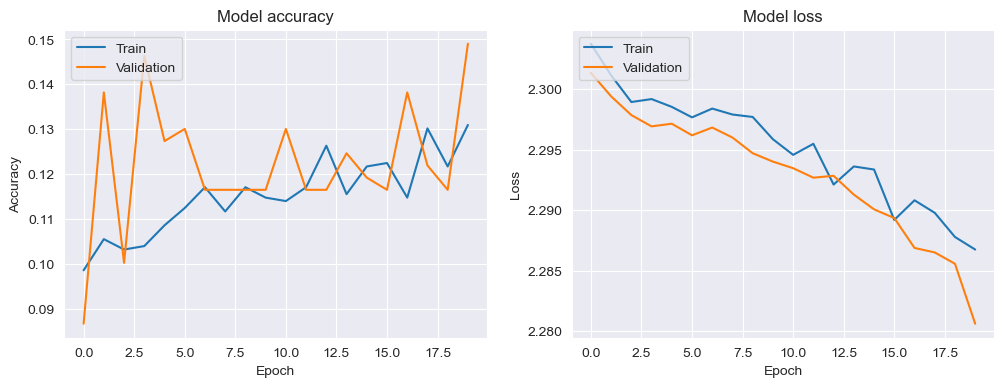

In [11]:
# Visualisation de l'historique d'entraînement
history = model_info.history

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 384ms/step
Classification Report:
                               precision    recall  f1-score   support

          n02085620-Chihuahua       0.00      0.00      0.00        16
   n02086646-Blenheim-spaniel       0.00      0.00      0.00        20
             n02088364-beagle       0.00      0.00      0.00        20
 n02091467-Norwegian-elkhound       0.16      0.70      0.26        20
             n02091831-Saluki       0.00      0.00      0.00        20
 n02099712-Labrador-retriever       0.00      0.00      0.00        18
      n02109525-Saint-Bernard       0.00      0.00      0.00        18
                n02110958-pug       0.00      0.00      0.00        20
         n02112018-Pomeranian       0.14      0.65      0.23        23
n02116738-African-hunting-dog       0.00      0.00      0.00        18

                     accuracy                           0.15       193
                    macro avg       0.03      0.14      0.05       193
             

/Users/tom/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


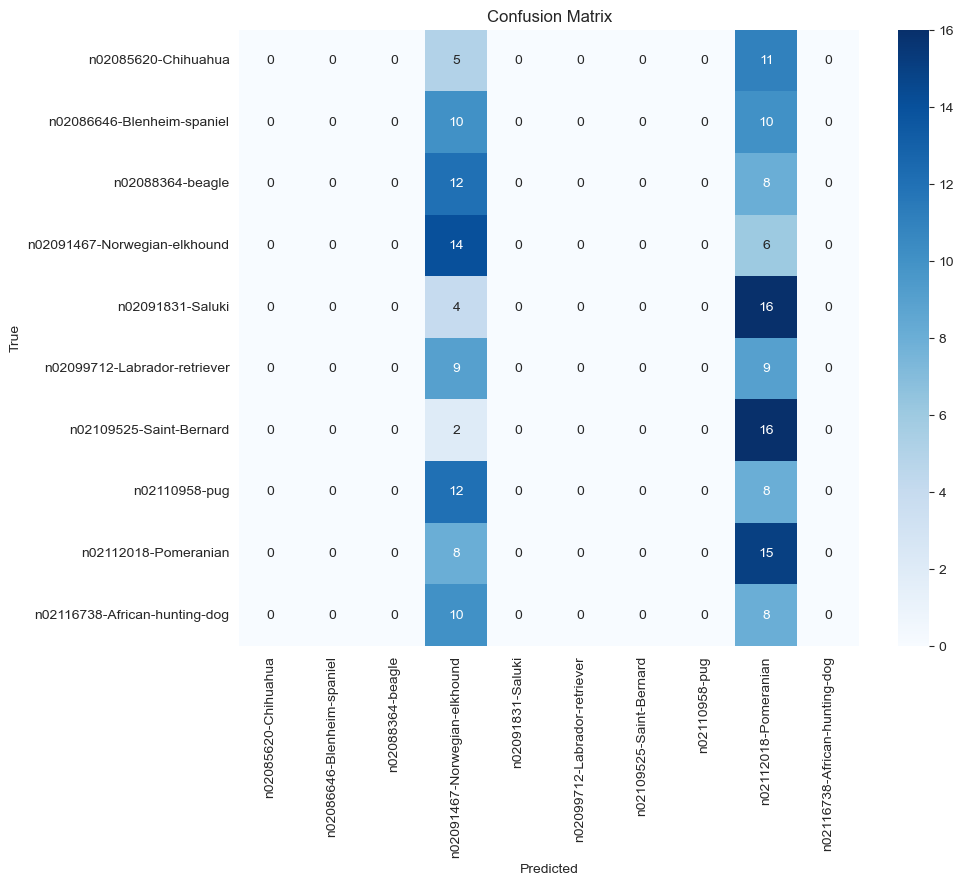

In [12]:
# Classification report et confusion matrix
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# Fonction de création du modèle à 3 couches
def create_model_3_couches():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10))  # 10 classes for 10 breeds
    model.add(Activation('softmax'))

    return model

In [14]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
)
val_datagen = ImageDataGenerator(
    rescale=1./255  # Normalize pixel values
)
test_datagen = ImageDataGenerator(
    rescale=1./255  # Normalize pixel values
)

In [15]:
# Chargement des données
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1298 images belonging to 10 classes.
Found 369 images belonging to 10 classes.
Found 193 images belonging to 10 classes.


In [16]:
mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")
# Define MLflow experiment name
mlflow.set_experiment("CNN")

<Experiment: artifact_location='mlflow-artifacts:/925267995700102517', creation_time=1717666661730, experiment_id='925267995700102517', last_update_time=1717666661730, lifecycle_stage='active', name='CNN', tags={}>

In [17]:
# Fonction d'entraînement du modèle
def train_model_3_couches(batch_size, epochs, learning_rate):
    model = create_model_3_couches()
    optimizer=SGD(learning_rate=learning_rate, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Start MLFlow run
    with mlflow.start_run():
        mlflow.log_param("batch_size", batch_size)
        mlflow.log_param("epochs", epochs)
        mlflow.log_param("learning_rate", learning_rate)

        # Enregistrement du temps d'entraînement du modèle
        start_time = time.time()
        
        history = model.fit(
            train_generator,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=val_generator,
            verbose = 2
        )
        
        # Fin du temps d'entraînement du modèle
        end_time = time.time()

        # Calcul du temps écoulé
        elapsed_time = end_time - start_time

        val_accuracy = history.history['val_accuracy'][-1]
        mlflow.log_metric("val_accuracy", val_accuracy)

        # Enregistrement du temps écoulé comme une métrique
        mlflow.log_metric("training_time", elapsed_time)

        mlflow.keras.log_model(model, "model")
        
        # Evaluation du modèle sur le jeu de test
        test_loss, test_acc = model.evaluate(test_generator)
        print(f'Test accuracy: {test_acc}')

        # Enregistrement de la précision sur le jeu de test
        mlflow.log_metric("test_accuracy", test_acc)

In [18]:
# Hyperparamètres
batch_sizes = [16, 32]
epochs_list = [10, 20]
learning_rates = [0.001, 0.0001]

In [19]:
# Sans data augmentation
# Entraînement de modèles à 3 couches avec différentes combinaisons d'hyperparamètres
for batch_size in batch_sizes:
    for epochs in epochs_list:
        for learning_rate in learning_rates:
            train_model_3_couches(batch_size, epochs, learning_rate)

/Users/tom/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10


/Users/tom/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 - 54s - 1s/step - accuracy: 0.1094 - loss: 2.3022 - val_accuracy: 0.1084 - val_loss: 2.2961
Epoch 2/10
41/41 - 53s - 1s/step - accuracy: 0.1009 - loss: 2.3010 - val_accuracy: 0.1220 - val_loss: 2.2980
Epoch 3/10
41/41 - 54s - 1s/step - accuracy: 0.0932 - loss: 2.3004 - val_accuracy: 0.1382 - val_loss: 2.2948
Epoch 4/10
41/41 - 52s - 1s/step - accuracy: 0.1171 - loss: 2.2976 - val_accuracy: 0.1220 - val_loss: 2.2934
Epoch 5/10
41/41 - 57s - 1s/step - accuracy: 0.1086 - loss: 2.2931 - val_accuracy: 0.1138 - val_loss: 2.2926
Epoch 6/10
41/41 - 56s - 1s/step - accuracy: 0.0978 - loss: 2.2928 - val_accuracy: 0.1057 - val_loss: 2.2884
Epoch 7/10
41/41 - 60s - 1s/step - accuracy: 0.1279 - loss: 2.2895 - val_accuracy: 0.1572 - val_loss: 2.2860
Epoch 8/10
41/41 - 60s - 1s/step - accuracy: 0.1256 - loss: 2.2893 - val_accuracy: 0.1436 - val_loss: 2.2865
Epoch 9/10
41/41 - 59s - 1s/step - accuracy: 0.1348 - loss: 2.2822 - val_accuracy: 0.1436 - val_loss: 2.2783
Epoch 10/10
41/41 - 61s - 1s/s

2024/09/10 15:45:08 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
/Users/tom/anaconda3/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 331ms/step - accuracy: 0.1561 - loss: 2.2899
Test accuracy: 0.15025906264781952


/Users/tom/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
41/41 - 58s - 1s/step - accuracy: 0.1032 - loss: 2.3024 - val_accuracy: 0.0894 - val_loss: 2.2976
Epoch 2/10
41/41 - 71s - 2s/step - accuracy: 0.1063 - loss: 2.2978 - val_accuracy: 0.1220 - val_loss: 2.2964
Epoch 3/10
41/41 - 67s - 2s/step - accuracy: 0.1109 - loss: 2.2948 - val_accuracy: 0.1247 - val_loss: 2.2958
Epoch 4/10
41/41 - 60s - 1s/step - accuracy: 0.1109 - loss: 2.2973 - val_accuracy: 0.1192 - val_loss: 2.2947
Epoch 5/10
41/41 - 59s - 1s/step - accuracy: 0.1163 - loss: 2.2998 - val_accuracy: 0.1111 - val_loss: 2.2955
Epoch 6/10
41/41 - 48s - 1s/step - accuracy: 0.1040 - loss: 2.2996 - val_accuracy: 0.1220 - val_loss: 2.2958
Epoch 7/10
41/41 - 54s - 1s/step - accuracy: 0.1071 - loss: 2.2925 - val_accuracy: 0.1084 - val_loss: 2.2955
Epoch 8/10
41/41 - 71s - 2s/step - accuracy: 0.0971 - loss: 2.2989 - val_accuracy: 0.1057 - val_loss: 2.2942
Epoch 9/10
41/41 - 58s - 1s/step - accuracy: 0.1140 - loss: 2.2983 - val_accuracy: 0.1084 - val_loss: 2.2956
Epoch 10/10
41/41 -

2024/09/10 15:55:33 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 294ms/step - accuracy: 0.0546 - loss: 2.3123
Test accuracy: 0.10362694412469864
Epoch 1/20
41/41 - 59s - 1s/step - accuracy: 0.1125 - loss: 2.3043 - val_accuracy: 0.1084 - val_loss: 2.2973
Epoch 2/20
41/41 - 57s - 1s/step - accuracy: 0.1279 - loss: 2.2961 - val_accuracy: 0.1057 - val_loss: 2.2968
Epoch 3/20
41/41 - 57s - 1s/step - accuracy: 0.0948 - loss: 2.2974 - val_accuracy: 0.1057 - val_loss: 2.2951
Epoch 4/20
41/41 - 58s - 1s/step - accuracy: 0.1032 - loss: 2.2958 - val_accuracy: 0.1057 - val_loss: 2.2950
Epoch 5/20
41/41 - 69s - 2s/step - accuracy: 0.1086 - loss: 2.2911 - val_accuracy: 0.1057 - val_loss: 2.2922
Epoch 6/20
41/41 - 60s - 1s/step - accuracy: 0.1217 - loss: 2.2926 - val_accuracy: 0.1409 - val_loss: 2.2931
Epoch 7/20
41/41 - 60s - 1s/step - accuracy: 0.1402 - loss: 2.2883 - val_accuracy: 0.1165 - val_loss: 2.2919
Epoch 8/20
41/41 - 59s - 1s/step - accuracy: 0.1156 - loss: 2.2895 - val_accuracy: 0.1165 - val_loss: 2.2868
Epoch 9/20
41/41 - 6

2024/09/10 16:15:55 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 328ms/step - accuracy: 0.1110 - loss: 2.2964
Test accuracy: 0.1865285038948059
Epoch 1/20
41/41 - 61s - 1s/step - accuracy: 0.1017 - loss: 2.3091 - val_accuracy: 0.1220 - val_loss: 2.2969
Epoch 2/20
41/41 - 60s - 1s/step - accuracy: 0.0978 - loss: 2.3015 - val_accuracy: 0.1301 - val_loss: 2.2962
Epoch 3/20
41/41 - 61s - 1s/step - accuracy: 0.1171 - loss: 2.2990 - val_accuracy: 0.1030 - val_loss: 2.2967
Epoch 4/20
41/41 - 60s - 1s/step - accuracy: 0.1071 - loss: 2.2998 - val_accuracy: 0.1111 - val_loss: 2.2979
Epoch 5/20
41/41 - 62s - 2s/step - accuracy: 0.1109 - loss: 2.2947 - val_accuracy: 0.1057 - val_loss: 2.2947
Epoch 6/20
41/41 - 61s - 1s/step - accuracy: 0.1055 - loss: 2.2982 - val_accuracy: 0.1192 - val_loss: 2.2941
Epoch 7/20
41/41 - 62s - 2s/step - accuracy: 0.1071 - loss: 2.2966 - val_accuracy: 0.1247 - val_loss: 2.2932
Epoch 8/20
41/41 - 61s - 1s/step - accuracy: 0.1063 - loss: 2.2959 - val_accuracy: 0.1165 - val_loss: 2.2945
Epoch 9/20
41/41 - 60

2024/09/10 16:36:42 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 365ms/step - accuracy: 0.0763 - loss: 2.3036
Test accuracy: 0.08808290213346481
Epoch 1/10
41/41 - 61s - 1s/step - accuracy: 0.1117 - loss: 2.3062 - val_accuracy: 0.1165 - val_loss: 2.2976
Epoch 2/10
41/41 - 59s - 1s/step - accuracy: 0.1032 - loss: 2.3014 - val_accuracy: 0.1084 - val_loss: 2.2983
Epoch 3/10
41/41 - 60s - 1s/step - accuracy: 0.1156 - loss: 2.3009 - val_accuracy: 0.1165 - val_loss: 2.2977
Epoch 4/10
41/41 - 59s - 1s/step - accuracy: 0.1171 - loss: 2.2980 - val_accuracy: 0.1165 - val_loss: 2.2969
Epoch 5/10
41/41 - 62s - 2s/step - accuracy: 0.1163 - loss: 2.2980 - val_accuracy: 0.1165 - val_loss: 2.2939
Epoch 6/10
41/41 - 60s - 1s/step - accuracy: 0.1117 - loss: 2.2987 - val_accuracy: 0.1165 - val_loss: 2.2961
Epoch 7/10
41/41 - 61s - 1s/step - accuracy: 0.1179 - loss: 2.2939 - val_accuracy: 0.1165 - val_loss: 2.2941
Epoch 8/10
41/41 - 59s - 1s/step - accuracy: 0.1109 - loss: 2.2971 - val_accuracy: 0.1165 - val_loss: 2.2953
Epoch 9/10
41/41 - 6

2024/09/10 16:47:05 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 331ms/step - accuracy: 0.0510 - loss: 2.3112
Test accuracy: 0.11917098611593246
Epoch 1/10
41/41 - 61s - 1s/step - accuracy: 0.1048 - loss: 2.3076 - val_accuracy: 0.1220 - val_loss: 2.2986
Epoch 2/10
41/41 - 61s - 1s/step - accuracy: 0.0971 - loss: 2.3000 - val_accuracy: 0.1111 - val_loss: 2.2958
Epoch 3/10
41/41 - 60s - 1s/step - accuracy: 0.0994 - loss: 2.2986 - val_accuracy: 0.0949 - val_loss: 2.2957
Epoch 4/10
41/41 - 60s - 1s/step - accuracy: 0.1133 - loss: 2.2969 - val_accuracy: 0.0976 - val_loss: 2.2931
Epoch 5/10
41/41 - 60s - 1s/step - accuracy: 0.1140 - loss: 2.2917 - val_accuracy: 0.1328 - val_loss: 2.2924
Epoch 6/10
41/41 - 60s - 1s/step - accuracy: 0.0963 - loss: 2.2986 - val_accuracy: 0.1192 - val_loss: 2.2931
Epoch 7/10
41/41 - 60s - 1s/step - accuracy: 0.1071 - loss: 2.2965 - val_accuracy: 0.1138 - val_loss: 2.2938
Epoch 8/10
41/41 - 60s - 1s/step - accuracy: 0.1055 - loss: 2.2948 - val_accuracy: 0.1328 - val_loss: 2.2926
Epoch 9/10
41/41 - 6

2024/09/10 16:57:26 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 323ms/step - accuracy: 0.0491 - loss: 2.3088
Test accuracy: 0.11398963630199432
Epoch 1/20
41/41 - 60s - 1s/step - accuracy: 0.0955 - loss: 2.3117 - val_accuracy: 0.1084 - val_loss: 2.2993
Epoch 2/20
41/41 - 61s - 1s/step - accuracy: 0.0994 - loss: 2.3033 - val_accuracy: 0.1084 - val_loss: 2.3003
Epoch 3/20
41/41 - 58s - 1s/step - accuracy: 0.1025 - loss: 2.3028 - val_accuracy: 0.1165 - val_loss: 2.3008
Epoch 4/20
41/41 - 59s - 1s/step - accuracy: 0.1048 - loss: 2.3017 - val_accuracy: 0.1084 - val_loss: 2.2998
Epoch 5/20
41/41 - 59s - 1s/step - accuracy: 0.1156 - loss: 2.3015 - val_accuracy: 0.1138 - val_loss: 2.3004
Epoch 6/20
41/41 - 59s - 1s/step - accuracy: 0.1186 - loss: 2.3007 - val_accuracy: 0.1057 - val_loss: 2.3003
Epoch 7/20
41/41 - 59s - 1s/step - accuracy: 0.1117 - loss: 2.2996 - val_accuracy: 0.1084 - val_loss: 2.2988
Epoch 8/20
41/41 - 59s - 1s/step - accuracy: 0.1086 - loss: 2.3003 - val_accuracy: 0.1220 - val_loss: 2.2985
Epoch 9/20
41/41 - 5

2024/09/10 17:17:36 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 333ms/step - accuracy: 0.1206 - loss: 2.3079
Test accuracy: 0.15544041991233826
Epoch 1/20
41/41 - 59s - 1s/step - accuracy: 0.1025 - loss: 2.3094 - val_accuracy: 0.1003 - val_loss: 2.2979
Epoch 2/20
41/41 - 61s - 1s/step - accuracy: 0.1117 - loss: 2.3008 - val_accuracy: 0.1192 - val_loss: 2.2955
Epoch 3/20
41/41 - 59s - 1s/step - accuracy: 0.1117 - loss: 2.2979 - val_accuracy: 0.1192 - val_loss: 2.2933
Epoch 4/20
41/41 - 60s - 1s/step - accuracy: 0.1163 - loss: 2.2997 - val_accuracy: 0.1111 - val_loss: 2.2967
Epoch 5/20
41/41 - 59s - 1s/step - accuracy: 0.1163 - loss: 2.2982 - val_accuracy: 0.1138 - val_loss: 2.2951
Epoch 6/20
41/41 - 61s - 1s/step - accuracy: 0.1055 - loss: 2.2958 - val_accuracy: 0.0921 - val_loss: 2.2951
Epoch 7/20
41/41 - 59s - 1s/step - accuracy: 0.1163 - loss: 2.2985 - val_accuracy: 0.1192 - val_loss: 2.2950
Epoch 8/20
41/41 - 62s - 2s/step - accuracy: 0.1186 - loss: 2.2957 - val_accuracy: 0.1057 - val_loss: 2.2946
Epoch 9/20
41/41 - 6

2024/09/10 17:38:06 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 333ms/step - accuracy: 0.0546 - loss: 2.3145
Test accuracy: 0.10362694412469864


In [20]:
# Modèle à plus de couches
def create_model_5_couches():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    
    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    return model

In [21]:
# Fonction d'entraînement du modèle à plus de couches
def train_model_5_couches(batch_size, epochs, learning_rate):
    model = create_model_5_couches()
    optimizer=SGD(learning_rate=learning_rate, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Start MLFlow run
    with mlflow.start_run():
        mlflow.log_param("batch_size", batch_size)
        mlflow.log_param("epochs", epochs)
        mlflow.log_param("learning_rate", learning_rate)
        
        # Enregistrement du temps d'entraînement du modèle
        start_time = time.time()
        
        history = model.fit(
            train_generator,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=val_generator,
            verbose = 2
        )
        
        # Fin du temps d'entraînement du modèle
        end_time = time.time()

        # Calcul du temps écoulé
        elapsed_time = end_time - start_time

        # Enregistrement du temps écoulé comme une métrique
        mlflow.log_metric("training_time", elapsed_time)
        
        val_accuracy = history.history['val_accuracy'][-1]
        mlflow.log_metric("val_accuracy", val_accuracy)

        mlflow.keras.log_model(model, "model")

        # Evaluation du modèle sur le jeu de test
        test_loss, test_acc = model.evaluate(test_generator)
        print(f'Test accuracy: {test_acc}')

        # Enregistrement de la précision sur le jeu de test
        mlflow.log_metric("test_accuracy", test_acc)

In [22]:
# Hyperparamètres
batch_sizes = [16, 32]
epochs_list = [10, 20]
learning_rates = [0.001, 0.0001]

# Sans data augmentation
# Entraînement de différents modèles à 5 couches avec différentes combinaisons d'hyperparamètres sans data augmentation
for batch_size in batch_sizes:
    for epochs in epochs_list:
        for learning_rate in learning_rates:
            train_model_5_couches(batch_size, epochs, learning_rate)

Epoch 1/10
41/41 - 65s - 2s/step - accuracy: 0.0994 - loss: 2.3034 - val_accuracy: 0.1084 - val_loss: 2.3016
Epoch 2/10
41/41 - 64s - 2s/step - accuracy: 0.1156 - loss: 2.3007 - val_accuracy: 0.1084 - val_loss: 2.3004
Epoch 3/10
41/41 - 65s - 2s/step - accuracy: 0.1140 - loss: 2.3009 - val_accuracy: 0.1084 - val_loss: 2.2989
Epoch 4/10
41/41 - 65s - 2s/step - accuracy: 0.1117 - loss: 2.2999 - val_accuracy: 0.0949 - val_loss: 2.2990
Epoch 5/10
41/41 - 64s - 2s/step - accuracy: 0.1233 - loss: 2.2971 - val_accuracy: 0.1084 - val_loss: 2.2967
Epoch 6/10
41/41 - 64s - 2s/step - accuracy: 0.1063 - loss: 2.2982 - val_accuracy: 0.1057 - val_loss: 2.2970
Epoch 7/10
41/41 - 64s - 2s/step - accuracy: 0.1094 - loss: 2.2951 - val_accuracy: 0.1030 - val_loss: 2.2947
Epoch 8/10
41/41 - 65s - 2s/step - accuracy: 0.1133 - loss: 2.2962 - val_accuracy: 0.1328 - val_loss: 2.2953
Epoch 9/10
41/41 - 64s - 2s/step - accuracy: 0.1148 - loss: 2.2952 - val_accuracy: 0.1491 - val_loss: 2.2943
Epoch 10/10
41/41 -

2024/09/10 17:49:08 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 409ms/step - accuracy: 0.1186 - loss: 2.3065
Test accuracy: 0.13989637792110443
Epoch 1/10
41/41 - 65s - 2s/step - accuracy: 0.0832 - loss: 2.3037 - val_accuracy: 0.0949 - val_loss: 2.3030
Epoch 2/10
41/41 - 64s - 2s/step - accuracy: 0.0917 - loss: 2.3030 - val_accuracy: 0.0894 - val_loss: 2.3029
Epoch 3/10
41/41 - 64s - 2s/step - accuracy: 0.0978 - loss: 2.3030 - val_accuracy: 0.0949 - val_loss: 2.3026
Epoch 4/10
41/41 - 63s - 2s/step - accuracy: 0.1009 - loss: 2.3024 - val_accuracy: 0.1138 - val_loss: 2.3023
Epoch 5/10
41/41 - 64s - 2s/step - accuracy: 0.1032 - loss: 2.3027 - val_accuracy: 0.1192 - val_loss: 2.3023
Epoch 6/10
41/41 - 63s - 2s/step - accuracy: 0.1040 - loss: 2.3021 - val_accuracy: 0.1247 - val_loss: 2.3020
Epoch 7/10
41/41 - 64s - 2s/step - accuracy: 0.1025 - loss: 2.3025 - val_accuracy: 0.1192 - val_loss: 2.3018
Epoch 8/10
41/41 - 64s - 2s/step - accuracy: 0.1179 - loss: 2.3021 - val_accuracy: 0.1192 - val_loss: 2.3019
Epoch 9/10
41/41 - 6

2024/09/10 18:00:21 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 414ms/step - accuracy: 0.0510 - loss: 2.3029
Test accuracy: 0.11917098611593246
Epoch 1/20
41/41 - 83s - 2s/step - accuracy: 0.0940 - loss: 2.3074 - val_accuracy: 0.1057 - val_loss: 2.2988
Epoch 2/20
41/41 - 78s - 2s/step - accuracy: 0.1233 - loss: 2.2994 - val_accuracy: 0.1165 - val_loss: 2.2976
Epoch 3/20
41/41 - 70s - 2s/step - accuracy: 0.1171 - loss: 2.2992 - val_accuracy: 0.1165 - val_loss: 2.2951
Epoch 4/20
41/41 - 71s - 2s/step - accuracy: 0.1009 - loss: 2.2981 - val_accuracy: 0.1247 - val_loss: 2.2949
Epoch 5/20
41/41 - 70s - 2s/step - accuracy: 0.1210 - loss: 2.2972 - val_accuracy: 0.1220 - val_loss: 2.2932
Epoch 6/20
41/41 - 69s - 2s/step - accuracy: 0.1202 - loss: 2.2960 - val_accuracy: 0.1491 - val_loss: 2.2936
Epoch 7/20
41/41 - 86s - 2s/step - accuracy: 0.1225 - loss: 2.2936 - val_accuracy: 0.1057 - val_loss: 2.2912
Epoch 8/20
41/41 - 57s - 1s/step - accuracy: 0.1179 - loss: 2.2950 - val_accuracy: 0.1382 - val_loss: 2.2908
Epoch 9/20
41/41 - 5

2024/09/10 18:22:57 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 268ms/step - accuracy: 0.1023 - loss: 2.2777
Test accuracy: 0.1606217622756958
Epoch 1/20
41/41 - 71s - 2s/step - accuracy: 0.0986 - loss: 2.3029 - val_accuracy: 0.1057 - val_loss: 2.3022
Epoch 2/20
41/41 - 60s - 1s/step - accuracy: 0.0971 - loss: 2.3035 - val_accuracy: 0.1057 - val_loss: 2.3009
Epoch 3/20
41/41 - 61s - 1s/step - accuracy: 0.1133 - loss: 2.3007 - val_accuracy: 0.1084 - val_loss: 2.3006
Epoch 4/20
41/41 - 62s - 2s/step - accuracy: 0.0994 - loss: 2.3024 - val_accuracy: 0.1084 - val_loss: 2.3002
Epoch 5/20
41/41 - 61s - 1s/step - accuracy: 0.1117 - loss: 2.3002 - val_accuracy: 0.1138 - val_loss: 2.3001
Epoch 6/20
41/41 - 61s - 1s/step - accuracy: 0.1063 - loss: 2.3009 - val_accuracy: 0.1057 - val_loss: 2.2988
Epoch 7/20
41/41 - 60s - 1s/step - accuracy: 0.1117 - loss: 2.2991 - val_accuracy: 0.1057 - val_loss: 2.2988
Epoch 8/20
41/41 - 61s - 1s/step - accuracy: 0.1133 - loss: 2.2989 - val_accuracy: 0.1030 - val_loss: 2.2985
Epoch 9/20
41/41 - 61

2024/09/10 18:43:47 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 428ms/step - accuracy: 0.0546 - loss: 2.3089
Test accuracy: 0.10362694412469864
Epoch 1/10
41/41 - 62s - 2s/step - accuracy: 0.1179 - loss: 2.3070 - val_accuracy: 0.1192 - val_loss: 2.2967
Epoch 2/10
41/41 - 60s - 1s/step - accuracy: 0.1233 - loss: 2.2981 - val_accuracy: 0.1165 - val_loss: 2.2964
Epoch 3/10
41/41 - 62s - 2s/step - accuracy: 0.1179 - loss: 2.2993 - val_accuracy: 0.1165 - val_loss: 2.2951
Epoch 4/10
41/41 - 61s - 1s/step - accuracy: 0.1109 - loss: 2.2969 - val_accuracy: 0.1165 - val_loss: 2.2951
Epoch 5/10
41/41 - 61s - 1s/step - accuracy: 0.0994 - loss: 2.2992 - val_accuracy: 0.1165 - val_loss: 2.2968
Epoch 6/10
41/41 - 61s - 1s/step - accuracy: 0.1248 - loss: 2.2951 - val_accuracy: 0.1165 - val_loss: 2.2953
Epoch 7/10
41/41 - 62s - 2s/step - accuracy: 0.1263 - loss: 2.2950 - val_accuracy: 0.1165 - val_loss: 2.2923
Epoch 8/10
41/41 - 61s - 1s/step - accuracy: 0.1032 - loss: 2.2953 - val_accuracy: 0.1165 - val_loss: 2.2930
Epoch 9/10
41/41 - 6

2024/09/10 18:54:17 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 379ms/step - accuracy: 0.0510 - loss: 2.3042
Test accuracy: 0.11917098611593246
Epoch 1/10
41/41 - 61s - 1s/step - accuracy: 0.1048 - loss: 2.3024 - val_accuracy: 0.1057 - val_loss: 2.3019
Epoch 2/10
41/41 - 61s - 1s/step - accuracy: 0.1040 - loss: 2.3016 - val_accuracy: 0.1057 - val_loss: 2.3008
Epoch 3/10
41/41 - 61s - 1s/step - accuracy: 0.1040 - loss: 2.3009 - val_accuracy: 0.1057 - val_loss: 2.3006
Epoch 4/10
41/41 - 61s - 1s/step - accuracy: 0.1102 - loss: 2.3029 - val_accuracy: 0.1057 - val_loss: 2.2993
Epoch 5/10
41/41 - 60s - 1s/step - accuracy: 0.1163 - loss: 2.2989 - val_accuracy: 0.1057 - val_loss: 2.2992
Epoch 6/10
41/41 - 62s - 2s/step - accuracy: 0.1133 - loss: 2.3010 - val_accuracy: 0.1057 - val_loss: 2.2989
Epoch 7/10
41/41 - 61s - 1s/step - accuracy: 0.1071 - loss: 2.2984 - val_accuracy: 0.1057 - val_loss: 2.2983
Epoch 8/10
41/41 - 61s - 1s/step - accuracy: 0.1109 - loss: 2.2960 - val_accuracy: 0.1057 - val_loss: 2.2977
Epoch 9/10
41/41 - 6

2024/09/10 19:04:47 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 345ms/step - accuracy: 0.1107 - loss: 2.3042
Test accuracy: 0.0984455943107605
Epoch 1/20
41/41 - 61s - 1s/step - accuracy: 0.1032 - loss: 2.3021 - val_accuracy: 0.1057 - val_loss: 2.2954
Epoch 2/20
41/41 - 62s - 2s/step - accuracy: 0.1071 - loss: 2.2989 - val_accuracy: 0.1057 - val_loss: 2.2948
Epoch 3/20
41/41 - 60s - 1s/step - accuracy: 0.1102 - loss: 2.3005 - val_accuracy: 0.1138 - val_loss: 2.2958
Epoch 4/20
41/41 - 62s - 2s/step - accuracy: 0.1102 - loss: 2.3002 - val_accuracy: 0.1165 - val_loss: 2.2963
Epoch 5/20
41/41 - 61s - 1s/step - accuracy: 0.1040 - loss: 2.2972 - val_accuracy: 0.1165 - val_loss: 2.2958
Epoch 6/20
41/41 - 62s - 2s/step - accuracy: 0.1233 - loss: 2.2935 - val_accuracy: 0.1165 - val_loss: 2.2929
Epoch 7/20
41/41 - 61s - 1s/step - accuracy: 0.1156 - loss: 2.2951 - val_accuracy: 0.1165 - val_loss: 2.2913
Epoch 8/20
41/41 - 62s - 2s/step - accuracy: 0.1171 - loss: 2.2944 - val_accuracy: 0.1274 - val_loss: 2.2920
Epoch 9/20
41/41 - 61

2024/09/10 19:25:36 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 349ms/step - accuracy: 0.1116 - loss: 2.2934
Test accuracy: 0.11917098611593246
Epoch 1/20
41/41 - 64s - 2s/step - accuracy: 0.1071 - loss: 2.3027 - val_accuracy: 0.1165 - val_loss: 2.3017
Epoch 2/20
41/41 - 60s - 1s/step - accuracy: 0.1133 - loss: 2.3021 - val_accuracy: 0.1165 - val_loss: 2.3019
Epoch 3/20
41/41 - 63s - 2s/step - accuracy: 0.1240 - loss: 2.3011 - val_accuracy: 0.1165 - val_loss: 2.3012
Epoch 4/20
41/41 - 60s - 1s/step - accuracy: 0.1117 - loss: 2.3011 - val_accuracy: 0.1165 - val_loss: 2.3011
Epoch 5/20
41/41 - 64s - 2s/step - accuracy: 0.1156 - loss: 2.3008 - val_accuracy: 0.1165 - val_loss: 2.3008
Epoch 6/20
41/41 - 61s - 1s/step - accuracy: 0.1063 - loss: 2.3016 - val_accuracy: 0.1165 - val_loss: 2.2996
Epoch 7/20
41/41 - 62s - 2s/step - accuracy: 0.1133 - loss: 2.2999 - val_accuracy: 0.1165 - val_loss: 2.2995
Epoch 8/20
41/41 - 60s - 1s/step - accuracy: 0.1194 - loss: 2.3011 - val_accuracy: 0.1165 - val_loss: 2.3007
Epoch 9/20
41/41 - 6

2024/09/10 19:46:36 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 344ms/step - accuracy: 0.0510 - loss: 2.3084
Test accuracy: 0.11917098611593246


In [23]:
# Avec data augmentation
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1. / 255,
                                 rotation_range=20,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [24]:
# Chargement des données
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1298 images belonging to 10 classes.
Found 369 images belonging to 10 classes.
Found 193 images belonging to 10 classes.


In [25]:
# Hyperparamètres
batch_sizes = [16, 32]
epochs_list = [10, 20]
learning_rates = [0.001, 0.0001]

In [26]:
# Avec data augmentation
# Entraînement de différents modèles à 3 couches avec différentes combinaisons d'hyperparamètres avec data augmentation
for batch_size in batch_sizes:
    for epochs in epochs_list:
        for learning_rate in learning_rates:
            train_model_3_couches(batch_size, epochs, learning_rate)

Epoch 1/10
41/41 - 73s - 2s/step - accuracy: 0.0955 - loss: 2.3114 - val_accuracy: 0.1084 - val_loss: 2.3009
Epoch 2/10
41/41 - 73s - 2s/step - accuracy: 0.1055 - loss: 2.3016 - val_accuracy: 0.1003 - val_loss: 2.3005
Epoch 3/10
41/41 - 71s - 2s/step - accuracy: 0.1133 - loss: 2.3003 - val_accuracy: 0.1084 - val_loss: 2.2997
Epoch 4/10
41/41 - 71s - 2s/step - accuracy: 0.1186 - loss: 2.2996 - val_accuracy: 0.1084 - val_loss: 2.2979
Epoch 5/10
41/41 - 71s - 2s/step - accuracy: 0.1210 - loss: 2.3000 - val_accuracy: 0.1084 - val_loss: 2.2988
Epoch 6/10
41/41 - 70s - 2s/step - accuracy: 0.1040 - loss: 2.3013 - val_accuracy: 0.1084 - val_loss: 2.2990
Epoch 7/10
41/41 - 72s - 2s/step - accuracy: 0.1071 - loss: 2.3008 - val_accuracy: 0.1165 - val_loss: 2.2979
Epoch 8/10
41/41 - 71s - 2s/step - accuracy: 0.1186 - loss: 2.2996 - val_accuracy: 0.1084 - val_loss: 2.2987
Epoch 9/10
41/41 - 71s - 2s/step - accuracy: 0.1079 - loss: 2.2988 - val_accuracy: 0.1138 - val_loss: 2.2973
Epoch 10/10
41/41 -

2024/09/10 19:58:50 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 323ms/step - accuracy: 0.0658 - loss: 2.3134
Test accuracy: 0.13989637792110443
Epoch 1/10
41/41 - 71s - 2s/step - accuracy: 0.1117 - loss: 2.3021 - val_accuracy: 0.1165 - val_loss: 2.2969
Epoch 2/10
41/41 - 71s - 2s/step - accuracy: 0.1079 - loss: 2.3020 - val_accuracy: 0.1003 - val_loss: 2.2970
Epoch 3/10
41/41 - 72s - 2s/step - accuracy: 0.1163 - loss: 2.2980 - val_accuracy: 0.0867 - val_loss: 2.2956
Epoch 4/10
41/41 - 71s - 2s/step - accuracy: 0.1133 - loss: 2.2958 - val_accuracy: 0.1192 - val_loss: 2.2955
Epoch 5/10
41/41 - 72s - 2s/step - accuracy: 0.1086 - loss: 2.2978 - val_accuracy: 0.1192 - val_loss: 2.2944
Epoch 6/10
41/41 - 70s - 2s/step - accuracy: 0.1025 - loss: 2.2981 - val_accuracy: 0.1220 - val_loss: 2.2946
Epoch 7/10
41/41 - 73s - 2s/step - accuracy: 0.1002 - loss: 2.2973 - val_accuracy: 0.1138 - val_loss: 2.2939
Epoch 8/10
41/41 - 72s - 2s/step - accuracy: 0.0971 - loss: 2.2978 - val_accuracy: 0.1165 - val_loss: 2.2958
Epoch 9/10
41/41 - 7

2024/09/10 20:11:04 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 338ms/step - accuracy: 0.0719 - loss: 2.3040
Test accuracy: 0.12953367829322815
Epoch 1/20
41/41 - 73s - 2s/step - accuracy: 0.0986 - loss: 2.3122 - val_accuracy: 0.1084 - val_loss: 2.2995
Epoch 2/20
41/41 - 71s - 2s/step - accuracy: 0.1133 - loss: 2.3010 - val_accuracy: 0.1084 - val_loss: 2.2956
Epoch 3/20
41/41 - 73s - 2s/step - accuracy: 0.0986 - loss: 2.2997 - val_accuracy: 0.1084 - val_loss: 2.2962
Epoch 4/20
41/41 - 71s - 2s/step - accuracy: 0.1094 - loss: 2.2989 - val_accuracy: 0.1084 - val_loss: 2.2963
Epoch 5/20
41/41 - 72s - 2s/step - accuracy: 0.1140 - loss: 2.2982 - val_accuracy: 0.1084 - val_loss: 2.2959
Epoch 6/20
41/41 - 72s - 2s/step - accuracy: 0.1094 - loss: 2.2978 - val_accuracy: 0.1111 - val_loss: 2.2957
Epoch 7/20
41/41 - 71s - 2s/step - accuracy: 0.0978 - loss: 2.2970 - val_accuracy: 0.1084 - val_loss: 2.2936
Epoch 8/20
41/41 - 72s - 2s/step - accuracy: 0.1171 - loss: 2.2951 - val_accuracy: 0.1247 - val_loss: 2.2905
Epoch 9/20
41/41 - 7

2024/09/10 20:35:23 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 334ms/step - accuracy: 0.0925 - loss: 2.2686
Test accuracy: 0.12953367829322815
Epoch 1/20
41/41 - 72s - 2s/step - accuracy: 0.1002 - loss: 2.3046 - val_accuracy: 0.1003 - val_loss: 2.3015
Epoch 2/20
41/41 - 69s - 2s/step - accuracy: 0.0978 - loss: 2.3008 - val_accuracy: 0.1165 - val_loss: 2.2979
Epoch 3/20
41/41 - 70s - 2s/step - accuracy: 0.1109 - loss: 2.2985 - val_accuracy: 0.1165 - val_loss: 2.2978
Epoch 4/20
41/41 - 68s - 2s/step - accuracy: 0.1063 - loss: 2.2974 - val_accuracy: 0.1138 - val_loss: 2.2971
Epoch 5/20
41/41 - 70s - 2s/step - accuracy: 0.1063 - loss: 2.2972 - val_accuracy: 0.1165 - val_loss: 2.2969
Epoch 6/20
41/41 - 70s - 2s/step - accuracy: 0.1125 - loss: 2.2999 - val_accuracy: 0.1057 - val_loss: 2.2960
Epoch 7/20
41/41 - 69s - 2s/step - accuracy: 0.1094 - loss: 2.2967 - val_accuracy: 0.1165 - val_loss: 2.2968
Epoch 8/20
41/41 - 71s - 2s/step - accuracy: 0.1186 - loss: 2.2968 - val_accuracy: 0.1165 - val_loss: 2.2967
Epoch 9/20
41/41 - 6

2024/09/10 20:59:06 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 337ms/step - accuracy: 0.0510 - loss: 2.3029
Test accuracy: 0.11917098611593246
Epoch 1/10
41/41 - 72s - 2s/step - accuracy: 0.1048 - loss: 2.3059 - val_accuracy: 0.1057 - val_loss: 2.2970
Epoch 2/10
41/41 - 69s - 2s/step - accuracy: 0.1179 - loss: 2.3028 - val_accuracy: 0.1030 - val_loss: 2.2970
Epoch 3/10
41/41 - 71s - 2s/step - accuracy: 0.1148 - loss: 2.3010 - val_accuracy: 0.1220 - val_loss: 2.2944
Epoch 4/10
41/41 - 69s - 2s/step - accuracy: 0.1017 - loss: 2.2983 - val_accuracy: 0.1247 - val_loss: 2.2938
Epoch 5/10
41/41 - 71s - 2s/step - accuracy: 0.1017 - loss: 2.2967 - val_accuracy: 0.1165 - val_loss: 2.2927
Epoch 6/10
41/41 - 70s - 2s/step - accuracy: 0.1194 - loss: 2.2956 - val_accuracy: 0.1084 - val_loss: 2.2926
Epoch 7/10
41/41 - 71s - 2s/step - accuracy: 0.0932 - loss: 2.2979 - val_accuracy: 0.1328 - val_loss: 2.2925
Epoch 8/10
41/41 - 72s - 2s/step - accuracy: 0.1079 - loss: 2.2931 - val_accuracy: 0.1084 - val_loss: 2.2892
Epoch 9/10
41/41 - 7

2024/09/10 21:11:14 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 310ms/step - accuracy: 0.1078 - loss: 2.3006
Test accuracy: 0.1347150206565857
Epoch 1/10
41/41 - 73s - 2s/step - accuracy: 0.1140 - loss: 2.3143 - val_accuracy: 0.1057 - val_loss: 2.2995
Epoch 2/10
41/41 - 70s - 2s/step - accuracy: 0.1002 - loss: 2.2994 - val_accuracy: 0.1084 - val_loss: 2.2958
Epoch 3/10
41/41 - 72s - 2s/step - accuracy: 0.1009 - loss: 2.2994 - val_accuracy: 0.1057 - val_loss: 2.2953
Epoch 4/10
41/41 - 70s - 2s/step - accuracy: 0.1071 - loss: 2.2996 - val_accuracy: 0.1057 - val_loss: 2.2974
Epoch 5/10
41/41 - 71s - 2s/step - accuracy: 0.1079 - loss: 2.2925 - val_accuracy: 0.1057 - val_loss: 2.2944
Epoch 6/10
41/41 - 71s - 2s/step - accuracy: 0.1040 - loss: 2.3014 - val_accuracy: 0.1057 - val_loss: 2.2939
Epoch 7/10
41/41 - 70s - 2s/step - accuracy: 0.1071 - loss: 2.2993 - val_accuracy: 0.0840 - val_loss: 2.2956
Epoch 8/10
41/41 - 72s - 2s/step - accuracy: 0.1071 - loss: 2.2958 - val_accuracy: 0.1192 - val_loss: 2.2950
Epoch 9/10
41/41 - 70

2024/09/10 21:23:23 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 325ms/step - accuracy: 0.1158 - loss: 2.3070
Test accuracy: 0.10362694412469864
Epoch 1/20
41/41 - 73s - 2s/step - accuracy: 0.0978 - loss: 2.3012 - val_accuracy: 0.1165 - val_loss: 2.2957
Epoch 2/20
41/41 - 70s - 2s/step - accuracy: 0.1256 - loss: 2.3009 - val_accuracy: 0.1165 - val_loss: 2.2965
Epoch 3/20
41/41 - 72s - 2s/step - accuracy: 0.1233 - loss: 2.2983 - val_accuracy: 0.1165 - val_loss: 2.2946
Epoch 4/20
41/41 - 70s - 2s/step - accuracy: 0.1032 - loss: 2.2948 - val_accuracy: 0.1165 - val_loss: 2.2928
Epoch 5/20
41/41 - 70s - 2s/step - accuracy: 0.1217 - loss: 2.2947 - val_accuracy: 0.1165 - val_loss: 2.2919
Epoch 6/20
41/41 - 74s - 2s/step - accuracy: 0.1194 - loss: 2.2965 - val_accuracy: 0.1165 - val_loss: 2.2919
Epoch 7/20
41/41 - 70s - 2s/step - accuracy: 0.1117 - loss: 2.2928 - val_accuracy: 0.1165 - val_loss: 2.2885
Epoch 8/20
41/41 - 73s - 2s/step - accuracy: 0.1156 - loss: 2.2908 - val_accuracy: 0.1274 - val_loss: 2.2850
Epoch 9/20
41/41 - 7

2024/09/10 21:47:30 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 327ms/step - accuracy: 0.1724 - loss: 2.2678
Test accuracy: 0.196891188621521
Epoch 1/20
41/41 - 73s - 2s/step - accuracy: 0.1063 - loss: 2.3077 - val_accuracy: 0.1084 - val_loss: 2.2989
Epoch 2/20
41/41 - 70s - 2s/step - accuracy: 0.1079 - loss: 2.3029 - val_accuracy: 0.1003 - val_loss: 2.2978
Epoch 3/20
41/41 - 73s - 2s/step - accuracy: 0.0955 - loss: 2.3017 - val_accuracy: 0.1165 - val_loss: 2.3004
Epoch 4/20
41/41 - 71s - 2s/step - accuracy: 0.1194 - loss: 2.3015 - val_accuracy: 0.1165 - val_loss: 2.2991
Epoch 5/20
41/41 - 70s - 2s/step - accuracy: 0.1148 - loss: 2.2991 - val_accuracy: 0.1220 - val_loss: 2.2985
Epoch 6/20
41/41 - 72s - 2s/step - accuracy: 0.1202 - loss: 2.2996 - val_accuracy: 0.1165 - val_loss: 2.2989
Epoch 7/20
41/41 - 70s - 2s/step - accuracy: 0.1133 - loss: 2.3002 - val_accuracy: 0.1165 - val_loss: 2.2980
Epoch 8/20
41/41 - 72s - 2s/step - accuracy: 0.1140 - loss: 2.2983 - val_accuracy: 0.1165 - val_loss: 2.2957
Epoch 9/20
41/41 - 71s

2024/09/10 22:11:37 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 327ms/step - accuracy: 0.0510 - loss: 2.3060
Test accuracy: 0.11917098611593246


In [27]:
# Avec data augmentation
# Entraînement de différents modèles à 5 couches avec différentes combinaisons d'hyperparamètres avec data augmentation
for batch_size in batch_sizes:
    for epochs in epochs_list:
        for learning_rate in learning_rates:
            train_model_5_couches(batch_size, epochs, learning_rate)

Epoch 1/10
41/41 - 77s - 2s/step - accuracy: 0.0986 - loss: 2.3054 - val_accuracy: 0.1165 - val_loss: 2.2993
Epoch 2/10
41/41 - 73s - 2s/step - accuracy: 0.0994 - loss: 2.3016 - val_accuracy: 0.1355 - val_loss: 2.2985
Epoch 3/10
41/41 - 74s - 2s/step - accuracy: 0.1079 - loss: 2.3000 - val_accuracy: 0.1165 - val_loss: 2.2990
Epoch 4/10
41/41 - 75s - 2s/step - accuracy: 0.1109 - loss: 2.2991 - val_accuracy: 0.1165 - val_loss: 2.2977
Epoch 5/10
41/41 - 74s - 2s/step - accuracy: 0.0986 - loss: 2.3001 - val_accuracy: 0.1192 - val_loss: 2.2963
Epoch 6/10
41/41 - 75s - 2s/step - accuracy: 0.1171 - loss: 2.2970 - val_accuracy: 0.1382 - val_loss: 2.2964
Epoch 7/10
41/41 - 75s - 2s/step - accuracy: 0.1148 - loss: 2.2986 - val_accuracy: 0.1165 - val_loss: 2.2950
Epoch 8/10
41/41 - 74s - 2s/step - accuracy: 0.1163 - loss: 2.2964 - val_accuracy: 0.1165 - val_loss: 2.2948
Epoch 9/10
41/41 - 75s - 2s/step - accuracy: 0.1140 - loss: 2.2952 - val_accuracy: 0.1165 - val_loss: 2.2955
Epoch 10/10
41/41 -

2024/09/10 22:24:22 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 378ms/step - accuracy: 0.0510 - loss: 2.3177
Test accuracy: 0.11917098611593246
Epoch 1/10
41/41 - 76s - 2s/step - accuracy: 0.1063 - loss: 2.3020 - val_accuracy: 0.0759 - val_loss: 2.3021
Epoch 2/10
41/41 - 75s - 2s/step - accuracy: 0.1071 - loss: 2.3029 - val_accuracy: 0.1220 - val_loss: 2.3020
Epoch 3/10
41/41 - 74s - 2s/step - accuracy: 0.1171 - loss: 2.3030 - val_accuracy: 0.1165 - val_loss: 2.3016
Epoch 4/10
41/41 - 75s - 2s/step - accuracy: 0.1063 - loss: 2.3014 - val_accuracy: 0.1220 - val_loss: 2.3017
Epoch 5/10
41/41 - 76s - 2s/step - accuracy: 0.1148 - loss: 2.3022 - val_accuracy: 0.1192 - val_loss: 2.3016
Epoch 6/10
41/41 - 74s - 2s/step - accuracy: 0.1048 - loss: 2.3011 - val_accuracy: 0.1165 - val_loss: 2.3012
Epoch 7/10
41/41 - 75s - 2s/step - accuracy: 0.1171 - loss: 2.3008 - val_accuracy: 0.1192 - val_loss: 2.3005
Epoch 8/10
41/41 - 74s - 2s/step - accuracy: 0.1202 - loss: 2.3007 - val_accuracy: 0.1165 - val_loss: 2.3003
Epoch 9/10
41/41 - 7

2024/09/10 22:37:22 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 382ms/step - accuracy: 0.0560 - loss: 2.3110
Test accuracy: 0.12435232847929001
Epoch 1/20
41/41 - 79s - 2s/step - accuracy: 0.0932 - loss: 2.3020 - val_accuracy: 0.1003 - val_loss: 2.2995
Epoch 2/20
41/41 - 73s - 2s/step - accuracy: 0.0986 - loss: 2.2999 - val_accuracy: 0.1192 - val_loss: 2.2987
Epoch 3/20
41/41 - 76s - 2s/step - accuracy: 0.1133 - loss: 2.2970 - val_accuracy: 0.1220 - val_loss: 2.2957
Epoch 4/20
41/41 - 76s - 2s/step - accuracy: 0.1048 - loss: 2.2966 - val_accuracy: 0.1165 - val_loss: 2.2953
Epoch 5/20
41/41 - 74s - 2s/step - accuracy: 0.1256 - loss: 2.2969 - val_accuracy: 0.1165 - val_loss: 2.2947
Epoch 6/20
41/41 - 76s - 2s/step - accuracy: 0.1071 - loss: 2.2986 - val_accuracy: 0.1165 - val_loss: 2.2946
Epoch 7/20
41/41 - 73s - 2s/step - accuracy: 0.1217 - loss: 2.2959 - val_accuracy: 0.1165 - val_loss: 2.2948
Epoch 8/20
41/41 - 74s - 2s/step - accuracy: 0.1194 - loss: 2.2965 - val_accuracy: 0.1165 - val_loss: 2.2925
Epoch 9/20
41/41 - 7

2024/09/10 23:02:16 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 358ms/step - accuracy: 0.1167 - loss: 2.2869
Test accuracy: 0.16580310463905334
Epoch 1/20
41/41 - 74s - 2s/step - accuracy: 0.0909 - loss: 2.3015 - val_accuracy: 0.0949 - val_loss: 2.3001
Epoch 2/20
41/41 - 73s - 2s/step - accuracy: 0.1055 - loss: 2.3001 - val_accuracy: 0.1030 - val_loss: 2.3003
Epoch 3/20
41/41 - 72s - 2s/step - accuracy: 0.1094 - loss: 2.3006 - val_accuracy: 0.1084 - val_loss: 2.3005
Epoch 4/20
41/41 - 74s - 2s/step - accuracy: 0.1032 - loss: 2.3015 - val_accuracy: 0.1003 - val_loss: 2.2992
Epoch 5/20
41/41 - 73s - 2s/step - accuracy: 0.0978 - loss: 2.3013 - val_accuracy: 0.1030 - val_loss: 2.3000
Epoch 6/20
41/41 - 72s - 2s/step - accuracy: 0.1179 - loss: 2.2987 - val_accuracy: 0.0949 - val_loss: 2.3000
Epoch 7/20
41/41 - 74s - 2s/step - accuracy: 0.1125 - loss: 2.3000 - val_accuracy: 0.1111 - val_loss: 2.2989
Epoch 8/20
41/41 - 73s - 2s/step - accuracy: 0.1086 - loss: 2.2986 - val_accuracy: 0.1030 - val_loss: 2.2990
Epoch 9/20
41/41 - 7

2024/09/10 23:27:06 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 347ms/step - accuracy: 0.0546 - loss: 2.3040
Test accuracy: 0.10362694412469864
Epoch 1/10
41/41 - 76s - 2s/step - accuracy: 0.0948 - loss: 2.3022 - val_accuracy: 0.1030 - val_loss: 2.3010
Epoch 2/10
41/41 - 73s - 2s/step - accuracy: 0.1086 - loss: 2.3004 - val_accuracy: 0.1165 - val_loss: 2.2985
Epoch 3/10
41/41 - 76s - 2s/step - accuracy: 0.1086 - loss: 2.2987 - val_accuracy: 0.1165 - val_loss: 2.2979
Epoch 4/10
41/41 - 74s - 2s/step - accuracy: 0.1079 - loss: 2.2993 - val_accuracy: 0.1165 - val_loss: 2.2957
Epoch 5/10
41/41 - 74s - 2s/step - accuracy: 0.1094 - loss: 2.2974 - val_accuracy: 0.1165 - val_loss: 2.2954
Epoch 6/10
41/41 - 75s - 2s/step - accuracy: 0.1248 - loss: 2.2950 - val_accuracy: 0.1192 - val_loss: 2.2929
Epoch 7/10
41/41 - 73s - 2s/step - accuracy: 0.1240 - loss: 2.2938 - val_accuracy: 0.1165 - val_loss: 2.2907
Epoch 8/10
41/41 - 76s - 2s/step - accuracy: 0.1133 - loss: 2.2932 - val_accuracy: 0.1247 - val_loss: 2.2921
Epoch 9/10
41/41 - 7

2024/09/10 23:39:51 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 364ms/step - accuracy: 0.0510 - loss: 2.3137
Test accuracy: 0.11917098611593246
Epoch 1/10
41/41 - 77s - 2s/step - accuracy: 0.1025 - loss: 2.3056 - val_accuracy: 0.1165 - val_loss: 2.3025
Epoch 2/10
41/41 - 75s - 2s/step - accuracy: 0.1055 - loss: 2.3044 - val_accuracy: 0.1192 - val_loss: 2.3024
Epoch 3/10
41/41 - 73s - 2s/step - accuracy: 0.1133 - loss: 2.3025 - val_accuracy: 0.1165 - val_loss: 2.3018
Epoch 4/10
41/41 - 76s - 2s/step - accuracy: 0.0955 - loss: 2.3043 - val_accuracy: 0.1165 - val_loss: 2.3007
Epoch 5/10
41/41 - 74s - 2s/step - accuracy: 0.1063 - loss: 2.3007 - val_accuracy: 0.1301 - val_loss: 2.3002
Epoch 6/10
41/41 - 74s - 2s/step - accuracy: 0.1148 - loss: 2.2984 - val_accuracy: 0.1192 - val_loss: 2.2997
Epoch 7/10
41/41 - 75s - 2s/step - accuracy: 0.1186 - loss: 2.3003 - val_accuracy: 0.1165 - val_loss: 2.2983
Epoch 8/10
41/41 - 74s - 2s/step - accuracy: 0.1125 - loss: 2.3002 - val_accuracy: 0.1138 - val_loss: 2.2978
Epoch 9/10
41/41 - 7

2024/09/10 23:52:36 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 398ms/step - accuracy: 0.0510 - loss: 2.3174
Test accuracy: 0.0984455943107605
Epoch 1/20
41/41 - 76s - 2s/step - accuracy: 0.1017 - loss: 2.3026 - val_accuracy: 0.1030 - val_loss: 2.2961
Epoch 2/20
41/41 - 74s - 2s/step - accuracy: 0.1117 - loss: 2.2983 - val_accuracy: 0.1165 - val_loss: 2.2954
Epoch 3/20
41/41 - 74s - 2s/step - accuracy: 0.1163 - loss: 2.2973 - val_accuracy: 0.1165 - val_loss: 2.2941
Epoch 4/20
41/41 - 73s - 2s/step - accuracy: 0.1009 - loss: 2.2974 - val_accuracy: 0.1220 - val_loss: 2.2948
Epoch 5/20
41/41 - 75s - 2s/step - accuracy: 0.1210 - loss: 2.2954 - val_accuracy: 0.1165 - val_loss: 2.2944
Epoch 6/20
41/41 - 77s - 2s/step - accuracy: 0.1117 - loss: 2.2941 - val_accuracy: 0.1165 - val_loss: 2.2898
Epoch 7/20
41/41 - 75s - 2s/step - accuracy: 0.1240 - loss: 2.2953 - val_accuracy: 0.1165 - val_loss: 2.2907
Epoch 8/20
41/41 - 76s - 2s/step - accuracy: 0.1163 - loss: 2.2924 - val_accuracy: 0.1165 - val_loss: 2.2895
Epoch 9/20
41/41 - 74

2024/09/11 00:17:52 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 371ms/step - accuracy: 0.1454 - loss: 2.2707
Test accuracy: 0.19170984625816345
Epoch 1/20
41/41 - 77s - 2s/step - accuracy: 0.0917 - loss: 2.3035 - val_accuracy: 0.0921 - val_loss: 2.3033
Epoch 2/20
41/41 - 74s - 2s/step - accuracy: 0.1025 - loss: 2.3029 - val_accuracy: 0.0921 - val_loss: 2.3024
Epoch 3/20
41/41 - 73s - 2s/step - accuracy: 0.1079 - loss: 2.3026 - val_accuracy: 0.0894 - val_loss: 2.3026
Epoch 4/20
41/41 - 76s - 2s/step - accuracy: 0.1048 - loss: 2.3019 - val_accuracy: 0.1003 - val_loss: 2.3026
Epoch 5/20
41/41 - 74s - 2s/step - accuracy: 0.1017 - loss: 2.3030 - val_accuracy: 0.1003 - val_loss: 2.3015
Epoch 6/20
41/41 - 74s - 2s/step - accuracy: 0.1055 - loss: 2.3012 - val_accuracy: 0.1138 - val_loss: 2.3010
Epoch 7/20
41/41 - 75s - 2s/step - accuracy: 0.0971 - loss: 2.3027 - val_accuracy: 0.1057 - val_loss: 2.3005
Epoch 8/20
41/41 - 74s - 2s/step - accuracy: 0.1117 - loss: 2.3013 - val_accuracy: 0.1192 - val_loss: 2.3008
Epoch 9/20
41/41 - 7

2024/09/11 00:43:08 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 399ms/step - accuracy: 0.1025 - loss: 2.3068
Test accuracy: 0.13989637792110443
